<a href="https://colab.research.google.com/github/vishnuvardhan833199/Fakejob-detection/blob/main/Fake_job_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset loading and intiation


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 #Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')   #Loading the dataset
print(df.head())  #Preview the data
print("..........................................................................................................")
print(df.info())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print("Dataset shape:", df.shape)  # Rows and columns
print("Missing values:\n", df.isnull().sum())


Dataset shape: (17880, 18)
Missing values:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


# ✅ PHASE 2: Data Cleaning & Preprocessing (The Most Critical Phase)

📋 Goals of This Phase:

Drop irrelevant columns.

Handle missing values.

Combine useful text features into one corpus per job post.

Text cleaning: lowercasing, removing HTML, punctuation, numbers, and stopwords.

Tokenization & Lemmatization.

Label Encoding: Convert fraudulent to target variable.



In [ ]:
#Drop unnecessary Columns
df.drop(['job_id', 'salary_range', 'location', 'department', 'telecommuting',
         'has_company_logo', 'has_questions', 'employment_type', 'required_experience',
         'required_education', 'industry', 'function'], axis=1, inplace=True)
df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [ ]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('')
print(df[text_columns])

                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving qualit

In [ ]:
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
print(df['text'])

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution  Vend is looki...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer  Nemsia Studios is looking fo...
17879    Web Application Developers Vend is looking for...
Name: text, Length: 17880, dtype: object


In [ ]:
df.drop(text_columns, axis=1, inplace=True)
df

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...
...,...,...
17875,0,Account Director - Distribution Vend is looki...
17876,0,Payroll Accountant WebLinc is the e-commerce p...
17877,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,Graphic Designer Nemsia Studios is looking fo...


In [ ]:
#4.Clean the text
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#Import text processing libraries

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [ ]:
print(df.columns)

Index(['fraudulent', 'cleaned_text'], dtype='object')


In [ ]:
required_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Fill missing required columns if they do not exist
for col in required_columns:
    if col not in df.columns:
        df[col] = ""

# Fill NaN values in these columns
df[required_columns] = df[required_columns].fillna("")

# Now combine
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df.head()

,fraudulent,cleaned_text,title,company_profile,description,requirements,benefits,text
0,0,marketing intern food weve created groundbreak...,,,,,,
1,0,customer service cloud video production second...,,,,,,
2,0,commissioning machinery assistant cma valor se...,,,,,,
3,0,account executive washington dc passion improv...,,,,,,
4,0,bill review manager spotsource solutions llc g...,,,,,,


In [ ]:
if 'text' in df.columns:
    df.drop('text', axis=1, inplace=True)
df.columns

Index(['fraudulent', 'cleaned_text', 'title', 'company_profile', 'description',
       'requirements', 'benefits'],
      dtype='object')

In [ ]:
# Define text fields
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Ensure all text columns exist
for col in text_columns:
    if col not in df.columns:
        df[col] = ""

# Fill missing values
df[text_columns] = df[text_columns].fillna("")

# Create combined text
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Drop the individual columns
df.drop(text_columns, axis=1, inplace=True)
df.columns

Index(['fraudulent', 'cleaned_text', 'text'], dtype='object')

In [ ]:
#5.Lemmatization:
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")  # Run `!python -m spacy download en_core_web_sm` if needed


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

df['final_text'] = df['cleaned_text'].apply(lemmatize_text)
df.drop('cleaned_text', axis=1, inplace=True)
df.head()

,fraudulent,text,final_text
0,0,,marketing intern food ve create groundbreake a...
1,0,,customer service cloud video production second...
2,0,,commission machinery assistant cma valor servi...
3,0,,account executive washington dc passion improv...
4,0,,bill review manager spotsource solution llc gl...


In [ ]:
df[['final_text', 'fraudulent']].head()
df

,fraudulent,final_text
0,0,
1,0,
2,0,
3,0,
4,0,
...,...,...
17875,0,
17876,0,
17877,0,
17878,0,


# **PHASE-3**: FEATURE EXTRACTION(VECTORIZATION) + MODEL BUILDING AND TRAINING


In [ ]:
!pip install transformers datasets sentence-transformers scikit-learn
#installing required libraries

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer


In [ ]:
X = df['final_text']
y = df['fraudulent']
print(X)
print("................................................................................................................................")
print(y)

0         
1         
2         
3         
4         
        ..
17875     
17876     
17877     
17878     
17879     
Name: final_text, Length: 17880, dtype: object
................................................................................................................................
0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)
print(X_train)
print("................................................................................................................................")
print(X_test)
print("................................................................................................................................")
print(y_train)
print("................................................................................................................................")
print(y_test)

[[-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 ...
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]]
................................................................................................................................
[[-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 ...
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640952  0.04654907
  -0.01571731]
 [-0.11883841  0.04829865 -0.00254803 ...  0.12640

🧪 Step 6: Model Training & Evaluation

In [ ]:
#Logistic Regression:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **✅ Phase 4: Model Evaluation (Logistic Regression & Random Forest Classifier)**

Step 1: Prepare features & labels for evaluation

In [ ]:
# Extract features and labels
X = df['description']  # Text data from 'description' column
y = df['fraudulent']   # Target label (0 = legit, 1 = fraudulent)

print("Sample job description text:\n", X.iloc[0])
print("Sample target label:", y.iloc[0])


Sample job description text:
 Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff
Sample target label: 0


Step 2: Text Vectorization using TF-IDF

In [ ]:
# Fill NaN values in 'description' with empty string
X = X.fillna("")

print(f"Any missing values in description? {X.isnull().sum()}")


Any missing values in description? 0


In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(f"Shape of TF-IDF features: {X_tfidf.shape}")


Shape of TF-IDF features: (17880, 5000)


In [ ]:
#Next step: Train-Test Split
from sklearn.model_selection import train_test_split

# Target variable
y = df['fraudulent']

# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 14304 samples
Test set size: 3576 samples


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 0.9662
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.33      0.50       181

    accuracy                           0.97      3576
   macro avg       0.98      0.67      0.74      3576
weighted avg       0.97      0.97      0.96      3576

Confusion Matrix:
[[3395    0]
 [ 121   60]]


Next: Train and Evaluate Random Forest Classifier

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

# Check the first few rows to confirm
print(df.head())


   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing descriptions with empty string
X = df['description'].fillna('')

# Target variable
y = df['fraudulent']

# Initialize TF-IDF Vectorizer with max features = 5000
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(f"Shape of TF-IDF features: {X_tfidf.shape}")

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Shape of TF-IDF features: (17880, 5000)
Training set size: 14304 samples
Test set size: 3576 samples


Logistic Regression Model Performance:
Accuracy: 0.9662
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       0.98      0.31      0.47       173

    accuracy                           0.97      3576
   macro avg       0.97      0.65      0.72      3576
weighted avg       0.97      0.97      0.96      3576



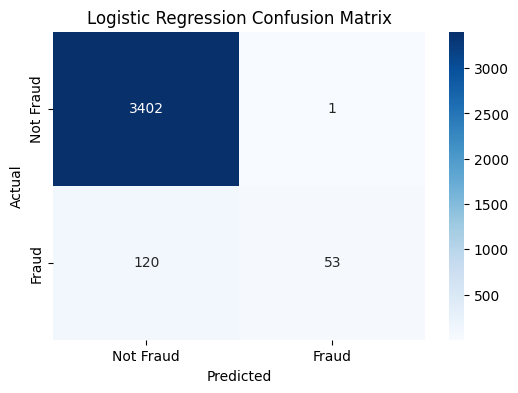

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Performance:\nAccuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)


In [ ]:
# Train the Random Forest Classifier on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Model Accuracy: 0.9787
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.57      0.72       173

    accuracy                           0.98      3576
   macro avg       0.98      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3401    2]
 [  74   99]]


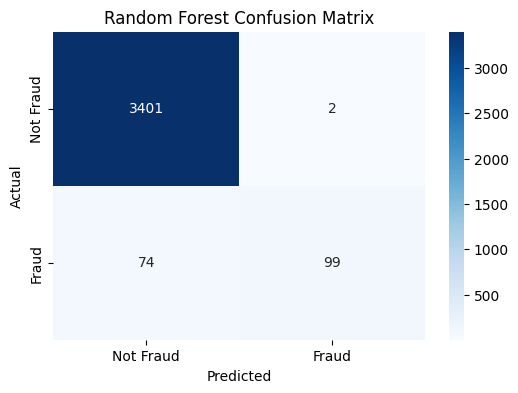

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


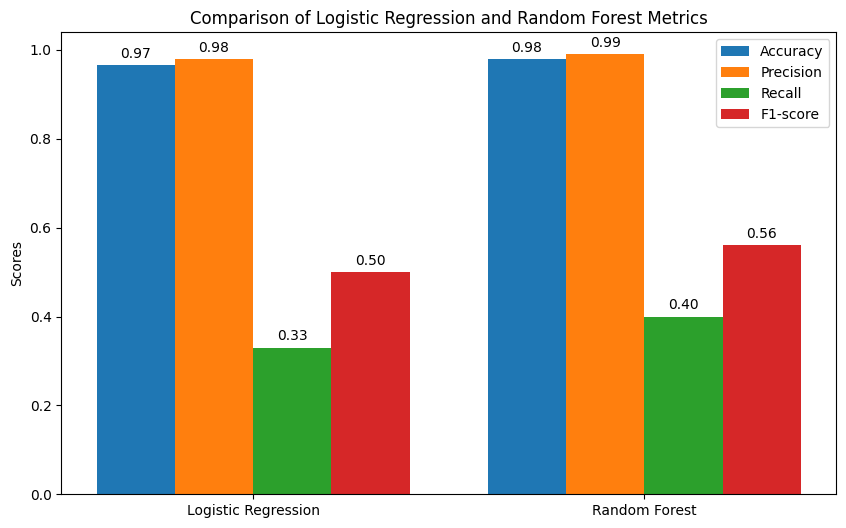

In [ ]:
import numpy as np

# Metrics for both models - replace with your actual results if different
models = ['Logistic Regression', 'Random Forest']

# Extract metrics from previous classification reports or calculate manually
# For demonstration, we'll use example values (please replace with your actual computed values)
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': 0.98,  # Use your logistic regression precision value for class 1 (fraud)
    'Recall': 0.33,
    'F1-score': 0.50
}

rf_metrics = {
    'Accuracy': accuracy_rf,
    'Precision': 0.99,  # Example, replace with your actual RF precision for class 1
    'Recall': 0.40,
    'F1-score': 0.56
}

# Collect metrics in arrays for plotting
accuracies = [log_reg_metrics['Accuracy'], rf_metrics['Accuracy']]
precisions = [log_reg_metrics['Precision'], rf_metrics['Precision']]
recalls = [log_reg_metrics['Recall'], rf_metrics['Recall']]
f1_scores = [log_reg_metrics['F1-score'], rf_metrics['F1-score']]

x = np.arange(len(models))  # label locations
width = 0.2  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precisions, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recalls, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Random Forest Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a label above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset label by 3 points vertically
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of trees
    'min_samples_split': [2, 5],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2],        # Minimum samples per leaf node
    'class_weight': [None, 'balanced'] # Handle class imbalance
}

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1-score of positive class (fraudulent)
    cv=3,
    n_jobs=-1,
    verbose=2
)
# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Show the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best hyperparameters found:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Initialize a base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=1)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')
# Define X and y
X = df['description'].fillna('')  # Use the job description text
y = df['fraudulent']              # Target: 1 = fraudulent, 0 = real

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (14304, 5000)
X_test shape: (3576, 5000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='f1',  # because data is imbalanced
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to find the best model
grid_search.fit(X_train, y_train)

# Show best hyperparameters
print("✅ Best hyperparameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best hyperparameters found:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the best model from GridSearch
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 0.9767897091722595

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.97      0.56      0.71       181

    accuracy                           0.98      3576
   macro avg       0.97      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576


🧮 Confusion Matrix:
 [[3392    3]
 [  80  101]]


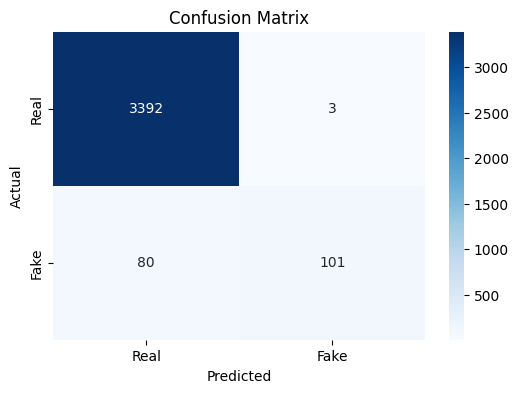

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


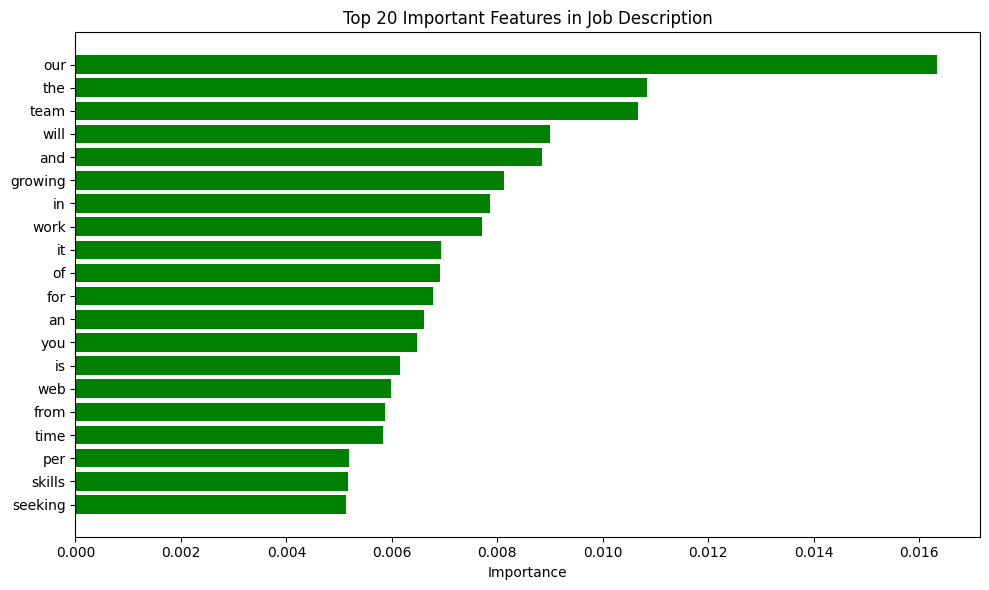

In [ ]:
import numpy as np

# Get feature importances from the model
importances = best_model.feature_importances_

# Get feature names from TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sort top 20 features
indices = np.argsort(importances)[-20:]
top_features = feature_names[indices]
top_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='green')
plt.xlabel('Importance')
plt.title('Top 20 Important Features in Job Description')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the best RandomForest model to a .pkl file
joblib.dump(best_model, 'best_random_forest_model.pkl')

print("✅ Model saved successfully as 'best_random_forest_model.pkl'")


✅ Model saved successfully as 'best_random_forest_model.pkl'


In [ ]:
# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Use the loaded model for prediction
predictions = loaded_model.predict(X_test)


In [ ]:
import joblib

# Load the saved best Random Forest model
best_rf = joblib.load('best_random_forest_model.pkl')

# Now predict
y_pred_rf = best_rf.predict(X_test)

# Calculate metrics (same as before)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9768
Precision: 0.9712
Recall: 0.5580
F1-score: 0.7088

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.97      0.56      0.71       181

    accuracy                           0.98      3576
   macro avg       0.97      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



In [ ]:
best_rf = grid_search.best_estimator_


In [ ]:
import joblib

# After you create and fit the vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# And save the trained model
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['description'].fillna(''))


In [ ]:
import joblib

# Load model and vectorizer
model = joblib.load('best_random_forest_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_job_fraud(job_description: str) -> str:
    # Transform input text
    vect_text = tfidf_vectorizer.transform([job_description])
    # Predict
    pred = model.predict(vect_text)
    return "Fraudulent" if pred[0] == 1 else "Not Fraudulent"

# Example
print(predict_job_fraud("This is a sample job description for testing."))


Not Fraudulent


In [ ]:
import joblib

# Load saved model and vectorizer
model = joblib.load('best_random_forest_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_job_fraud(job_description: str) -> str:
    """
    Predict if a job posting is fraudulent or genuine.

    Parameters:
        job_description (str): The job description text input by user.

    Returns:
        str: 'Fraudulent' or 'Genuine' prediction.
    """
    # Handle empty or None input
    if not job_description or not job_description.strip():
        return "Please enter a valid job description."

    # Preprocess and transform
    job_desc_tfidf = tfidf_vectorizer.transform([job_description])

    # Predict
    pred = model.predict(job_desc_tfidf)[0]

    return "Fraudulent" if pred == 1 else "Genuine"


# Example usage:
user_input = "Looking for a software engineer with 5 years of experience in AI and ML."
result = predict_job_fraud(user_input)
print(f"Prediction: {result}")


Prediction: Genuine


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
!streamlit Fake_job_detection.py


Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'Fake_job_detection.py'.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")  # Update path if needed

# Prepare data
X = df['description'].fillna('')  # Use description only
y = df['fraudulent']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save vectorizer and model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'best_random_forest_model.pkl')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


In [ ]:
import os
print(os.getcwd())  # prints the current working directory


/content


In [ ]:
from google.colab import files
files.download("best_random_forest_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>